<a href="https://colab.research.google.com/github/ydsyvn/mnist-activation-maximization/blob/main/mnist_activation_maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from nn_from_scratch import DeepNeuralNetwork

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Intro

Load weights

In [3]:
load_path = '/content/drive/MyDrive/Data/Mech Interp/mnist_model_weights.npz'

loaded_weights = np.load(load_path)

input_size = 784  # For MNIST (28*28)
hidden_size = 128
output_size = 10  # 10 digits

nn = DeepNeuralNetwork(input_size, hidden_size, output_size)

# Assign the loaded weights and biases to the new network instance
nn.W1 = loaded_weights['W1']
nn.b1 = loaded_weights['b1']
nn.W2 = loaded_weights['W2']
nn.b2 = loaded_weights['b2']

print("Model weights and biases loaded successfully.")

Model weights and biases loaded successfully.


Define X and y

In [4]:
import tensorflow as tf
import numpy as np

# Load MNIST using TensorFlow/Keras (you can change this to another library if you prefer)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Custom one-hot encoding function
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

# Apply custom one-hot encoding
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Predict on a few samples

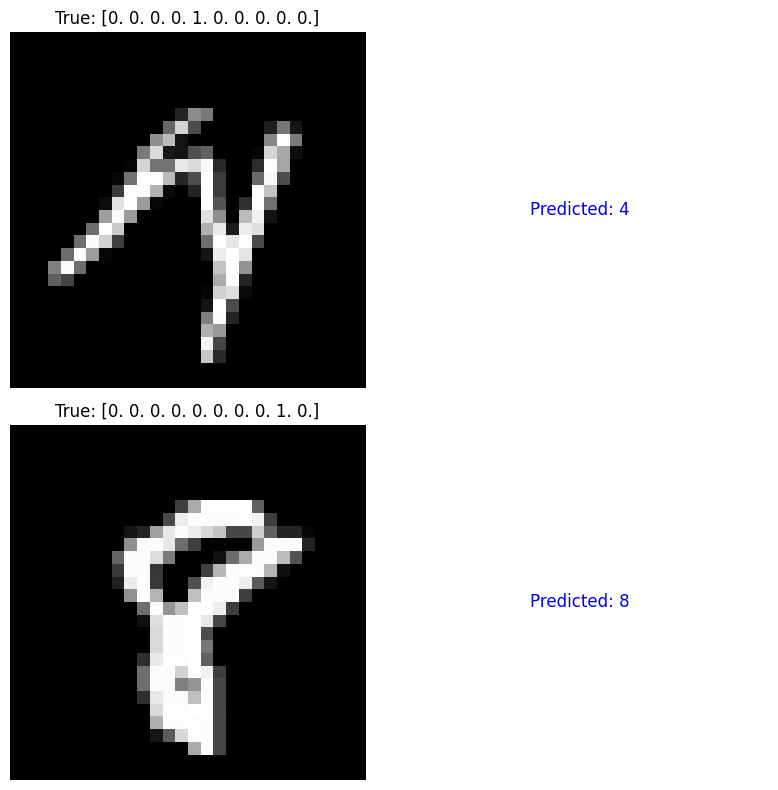

In [5]:
test_predictions = nn.predict(X_test)

nn.visualize_predictions(X_train, y_train, samples=2)

# Find top 5 samples for each class

In [6]:
test_predictions = nn.predict(X_test)

In [7]:
# nn.predict(X_test) was already called in the previous step, so z2 is already available
raw_activations_z2 = nn.z2

# Convert raw activations to predicted class labels
predicted_classes = np.argmax(raw_activations_z2, axis=1)

print("Shape of raw activations (z2):", raw_activations_z2.shape)
print("Shape of predicted classes:", predicted_classes.shape)
print("First 5 predicted classes:", predicted_classes[:5])

Shape of raw activations (z2): (10000, 10)
Shape of predicted classes: (10000,)
First 5 predicted classes: [7 2 1 0 4]


In [8]:
# Convert one-hot encoded y_test back to integer labels
true_labels = np.argmax(y_test, axis=1)

# List to store activation values for the correct class
correct_class_activations = []

# Iterate through each sample
for i in range(X_test.shape[0]):
    # Get the true class label for the current sample
    true_class = true_labels[i]

    # Get the activation value for the true class from z2
    activation_for_true_class = raw_activations_z2[i, true_class]

    # Append the activation value to the list
    correct_class_activations.append(activation_for_true_class)

# Convert the list to a NumPy array for easier handling
correct_class_activations = np.array(correct_class_activations)

print("Shape of correct_class_activations:", correct_class_activations.shape)
print("First 10 correct class activations:", correct_class_activations[:10])

Shape of correct_class_activations: (10000,)
First 10 correct class activations: [22.3731242  25.99717308 14.09259558 23.18520621 21.81004991 17.99546786
 19.31021809 17.81702663 15.99865441 23.42918204]


In [9]:
top_5_samples_per_class = {}

for class_label in range(10):
    # Find indices of samples with the current true class label
    indices_for_class = np.where(true_labels == class_label)[0]

    # Get the correct class activations for these samples
    activations_for_class = correct_class_activations[indices_for_class]

    # Sort activations in descending order and get the indices
    sorted_indices_within_class = np.argsort(activations_for_class)[::-1]

    # Get the top 5 indices within this subset
    top_5_indices_within_class = sorted_indices_within_class[:5]

    # Get the actual indices in the original X_test array
    top_5_original_indices = indices_for_class[top_5_indices_within_class]

    # Retrieve the top 5 samples and their activation values
    top_5_samples = X_test[top_5_original_indices]
    top_5_activations = activations_for_class[top_5_indices_within_class]

    # Store in the dictionary
    top_5_samples_per_class[class_label] = {
        'samples': top_5_samples,
        'activations': top_5_activations
    }

print("Top 5 samples and their activations for each class have been identified and stored.")
# You can optionally print the shapes to verify
for class_label in range(10):
    print(f"Class {class_label}: Samples shape {top_5_samples_per_class[class_label]['samples'].shape}, Activations shape {top_5_samples_per_class[class_label]['activations'].shape}")


Top 5 samples and their activations for each class have been identified and stored.
Class 0: Samples shape (5, 784), Activations shape (5,)
Class 1: Samples shape (5, 784), Activations shape (5,)
Class 2: Samples shape (5, 784), Activations shape (5,)
Class 3: Samples shape (5, 784), Activations shape (5,)
Class 4: Samples shape (5, 784), Activations shape (5,)
Class 5: Samples shape (5, 784), Activations shape (5,)
Class 6: Samples shape (5, 784), Activations shape (5,)
Class 7: Samples shape (5, 784), Activations shape (5,)
Class 8: Samples shape (5, 784), Activations shape (5,)
Class 9: Samples shape (5, 784), Activations shape (5,)


In [10]:
misclassified_indices = np.where(predicted_classes != true_labels)[0]

print(f"Number of misclassified samples found: {len(misclassified_indices)}")

Number of misclassified samples found: 193


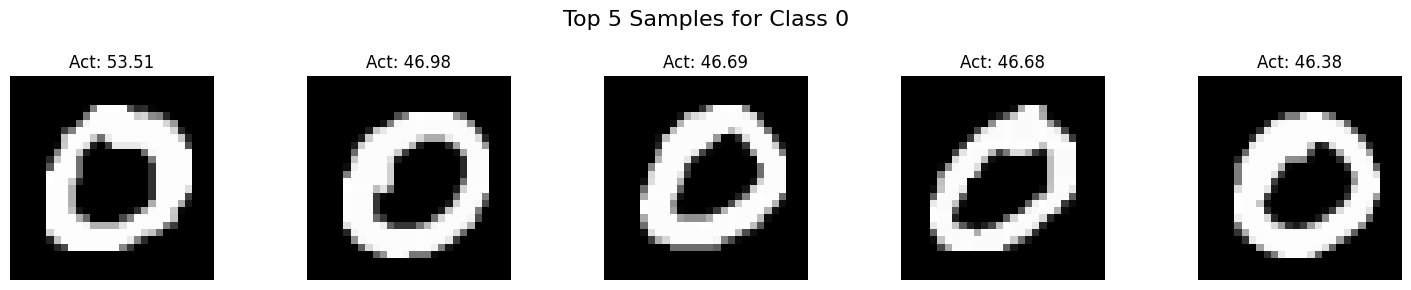

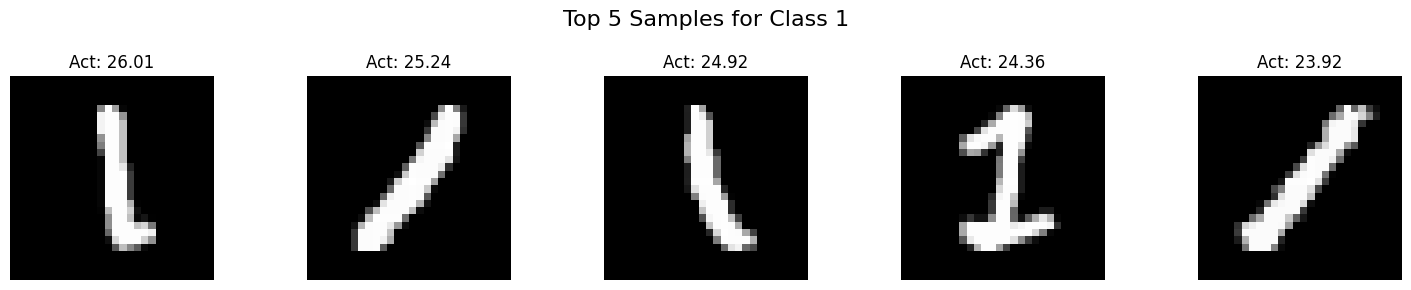

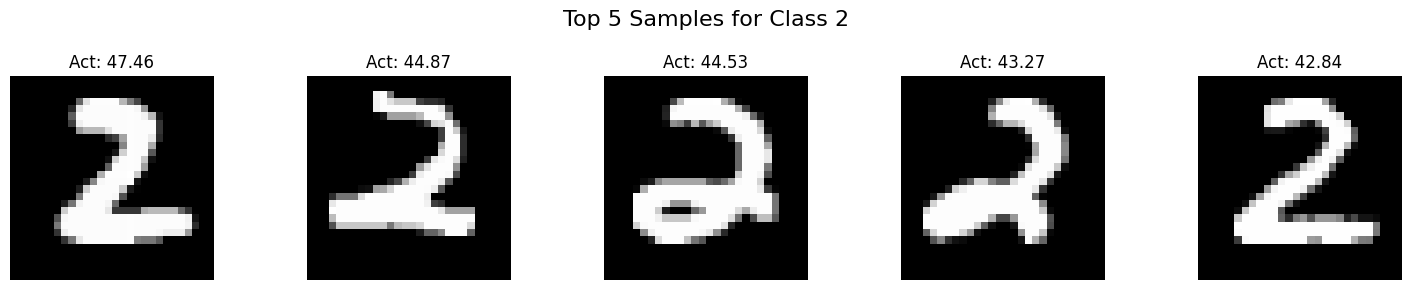

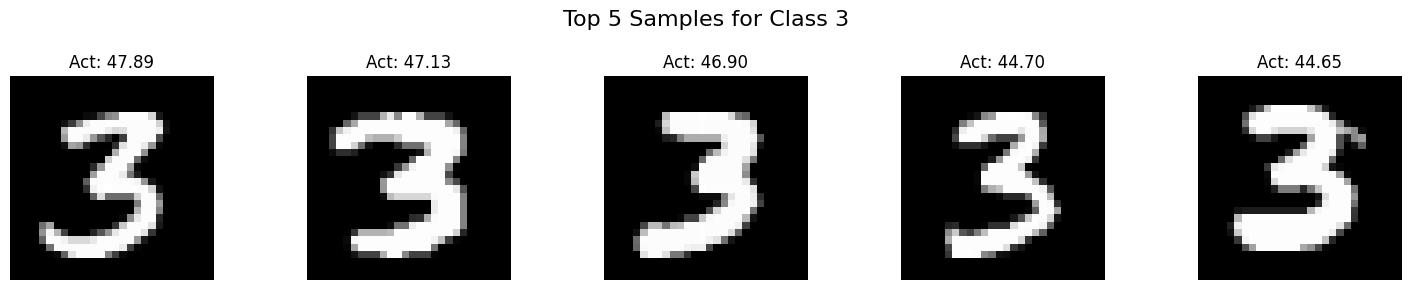

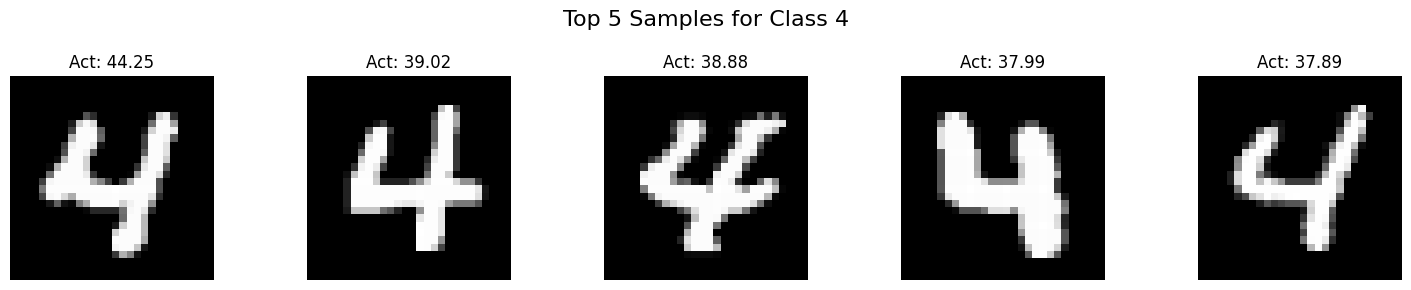

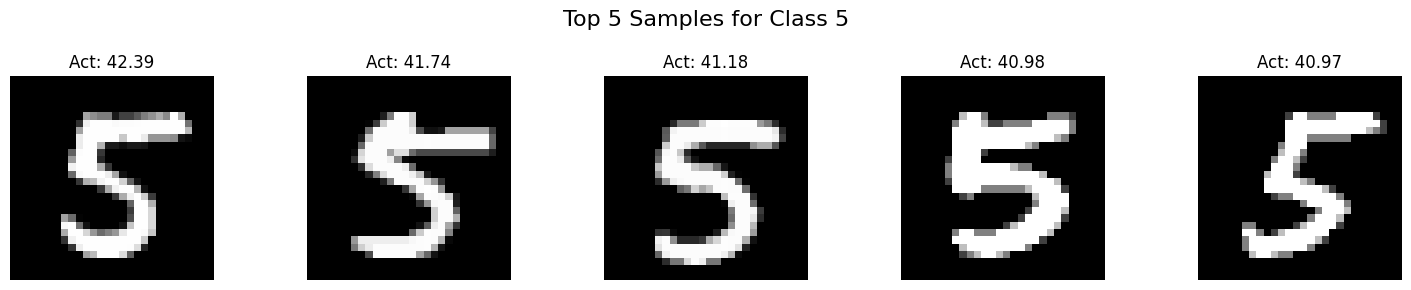

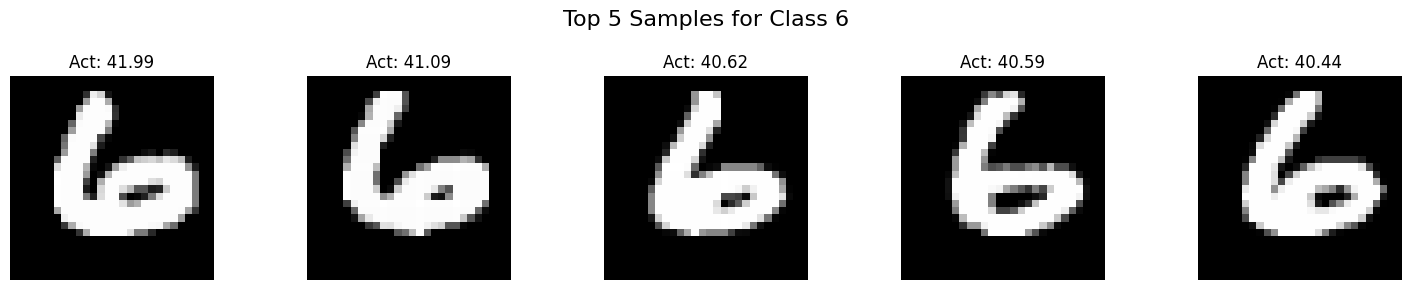

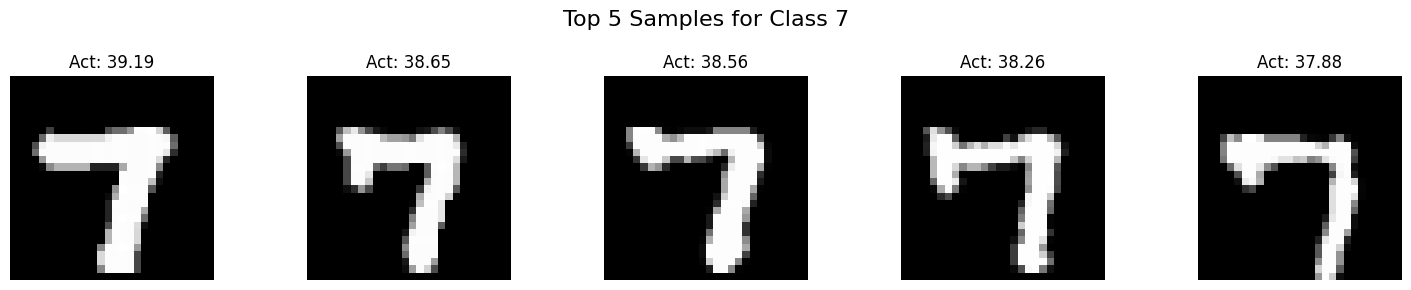

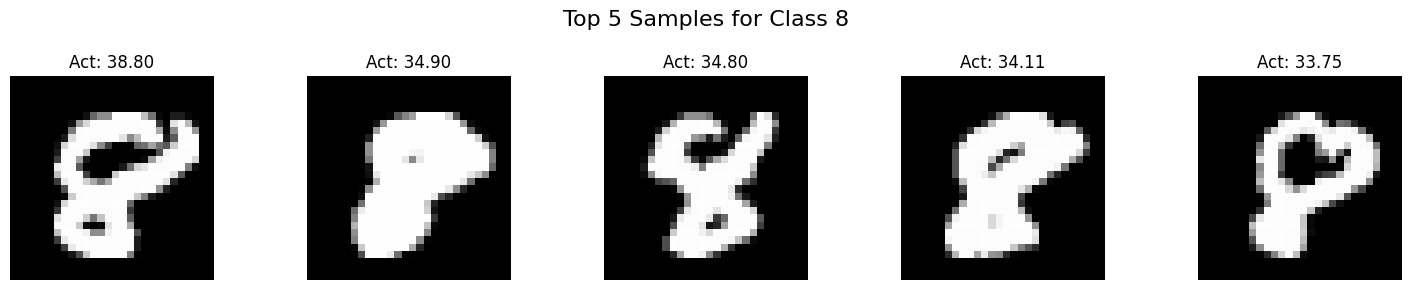

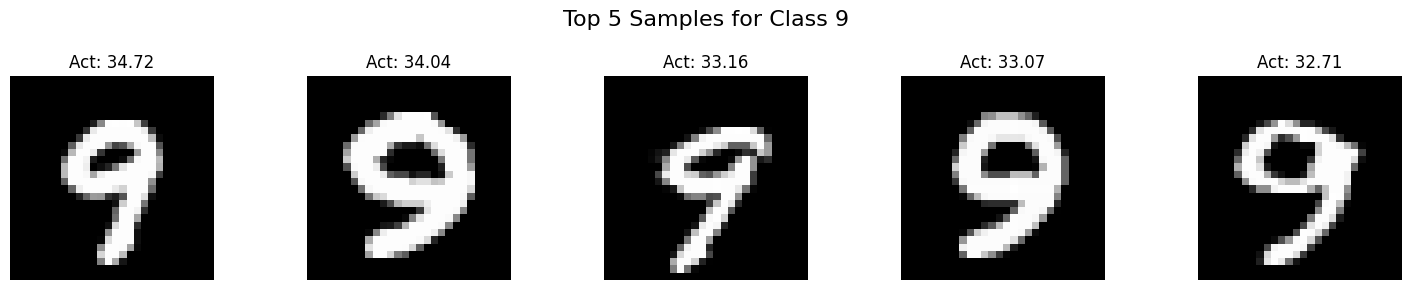

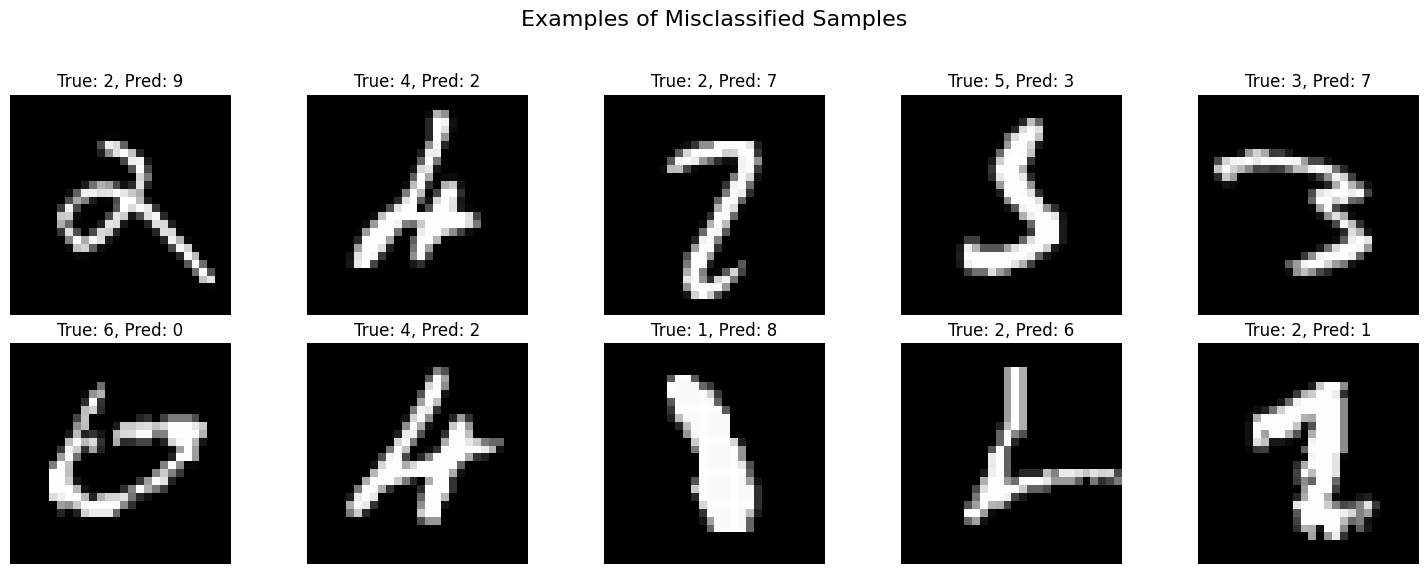

In [11]:
# Visualize the images of the top 5 samples for each class
for class_label in range(10):
    top_samples = top_5_samples_per_class[class_label]['samples']
    top_activations = top_5_samples_per_class[class_label]['activations']

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(f"Top 5 Samples for Class {class_label}", fontsize=16)

    for i in range(5):
        image = top_samples[i].reshape(28, 28)
        activation = top_activations[i]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Act: {activation:.2f}")
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Visualize a few examples of misclassified samples
num_misclassified_to_show = 10
selected_misclassified_indices = misclassified_indices[:num_misclassified_to_show]

fig, axes = plt.subplots(2, 5, figsize=(15, 6)) # Adjust grid size if showing more/less
fig.suptitle("Examples of Misclassified Samples", fontsize=16)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, idx in enumerate(selected_misclassified_indices):
    image = X_test[idx].reshape(28, 28)
    true_label = true_labels[idx]
    predicted_label = predicted_classes[idx]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"True: {true_label}, Pred: {predicted_label}")
    axes[i].axis('off')

# Hide any unused subplots if num_misclassified_to_show is less than the grid size
for j in range(num_misclassified_to_show, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
plt.show()

# Activation Maximization

In [12]:
def visualize_image(img):
  if (img.shape == (784,) or img.shape == (1, 784)):
    img = img.reshape(28, 28)

  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()

In [59]:
class ActivationMaximizationNN(DeepNeuralNetwork):
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
    super().__init__(input_size, hidden_size, output_size, learning_rate)

  def generate_random_image(self, mean=0.5, std=0.1):
    """ Generate random image """
    image = np.random.normal(loc=mean, scale=std, size=(28, 28))
    return np.clip(image, 0.0, 1.0)

  def show_images_grid(self, images, title="Activation Maximization"):
    """ Display grid of images """
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Class {i}')
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

  def activation_max_backward(self, target_class):
    """d_a2 = np.zeros_like(self.a2)
    d_a2[0, target_class] = 1.0

    d_z2 = self.a2.copy()
    d_z2[0, target_class] -= 1.0
    d_z2 = -d_z2

    d_a1 = np.dot(d_z2, self.W2.T)
    d_z1 = d_a1 * self.relu_derivative(self.z1)
    d_x = np.dot(d_z1, self.W1.T)"""

    d_z2 = np.zeros_like(self.z2)
    d_z2[0, target_class] = 1.0

    # Backpropagate through the network
    d_a1 = np.dot(d_z2, self.W2.T)
    d_z1 = d_a1 * self.relu_derivative(self.z1)
    d_x = np.dot(d_z1, self.W1.T)

    return d_x

  def activation_maximize_class(self, target_class, steps=100, lr=0.01, verbose=True):
    """
    Maximize activation for specific class
    """
    image = self.generate_random_image(mean=0.1, std=0.5)
    history = []

    if verbose:
      print(f"Maximizing class {target_class}")

    for step in range(steps):
      image_flat = image.reshape(1, 784)  # flatten image

      # Forward pass
      output = self.forward(image_flat)
      activation = self.z2[0, target_class]

      # Compute gradients
      grad = self.activation_max_backward(target_class)
      grad = grad.reshape(28, 28)

      image += lr * grad

      image = np.clip(image, 0.0, 1.0)

      if step % 50 == 0 and step > 0:
        lr *= 0.9

      history.append(activation)

      if verbose and (step % 10 == 0 or step+1 == steps):
        print(f"Step {step+1}/{steps} | Activation: {activation:.4f}")

    if verbose:
      print()

    return history, image.reshape(1, 784)

  def activation_maximize_all_classes(self, steps=100, lr=0.01, num_attempts=3, visualize=True, verbose=True):
    best_images = []
    history = []

    for idx in range(10):

      best_image = None
      best_activation = -np.inf
      class_history = []

      for attempt in range(num_attempts):
        if verbose and num_attempts > 1:
          print(f"Attempt {attempt+1}/{num_attempts}")

        attempt_history, image = self.activation_maximize_class(
          target_class=idx,
          steps=steps,
          lr=lr,
          verbose=verbose
        )

        output = self.forward(image)
        activation = self.z2[0, idx]

        if activation > best_activation:
          best_image = image.copy()
          best_activation = activation

        class_history.append(attempt_history)

        if verbose and num_attempts > 1:
          print(f"Final activation: {activation:.4f}")

      best_images.append(best_image)
      history.append(class_history)

      if verbose:
        print(f"Best activation for class {idx}: {best_activation:.4f}")

    if visualize:
      self.show_images_grid(best_images)

    return history, best_images


In [60]:
act_max_nn = ActivationMaximizationNN(input_size=784, hidden_size=128, output_size=10)

act_max_nn.W1 = loaded_weights['W1']
act_max_nn.b1 = loaded_weights['b1']
act_max_nn.W2 = loaded_weights['W2']
act_max_nn.b2 = loaded_weights['b2']

In [67]:
history, images = act_max_nn.activation_maximize_all_classes(steps=200, lr=0.1, visualize=False)

Attempt 1/3
Maximizing class 0
Step 1/200 | Activation: -0.2439
Step 11/200 | Activation: 48.4454
Step 21/200 | Activation: 72.9437
Step 31/200 | Activation: 83.8147
Step 41/200 | Activation: 90.1379
Step 51/200 | Activation: 93.1797
Step 61/200 | Activation: 94.5966
Step 71/200 | Activation: 95.5653
Step 81/200 | Activation: 96.2195
Step 91/200 | Activation: 96.7056
Step 101/200 | Activation: 97.0998
Step 111/200 | Activation: 97.3835
Step 121/200 | Activation: 97.6171
Step 131/200 | Activation: 97.8559
Step 141/200 | Activation: 98.0263
Step 151/200 | Activation: 98.1225
Step 161/200 | Activation: 98.2199
Step 171/200 | Activation: 98.2929
Step 181/200 | Activation: 98.3410
Step 191/200 | Activation: 98.3742
Step 200/200 | Activation: 98.4264

Final activation: 98.4188
Attempt 2/3
Maximizing class 0
Step 1/200 | Activation: -4.2946
Step 11/200 | Activation: 52.2036
Step 21/200 | Activation: 76.9952
Step 31/200 | Activation: 87.4631
Step 41/200 | Activation: 92.7219
Step 51/200 | Acti

## Visualize Maximized images and plot history

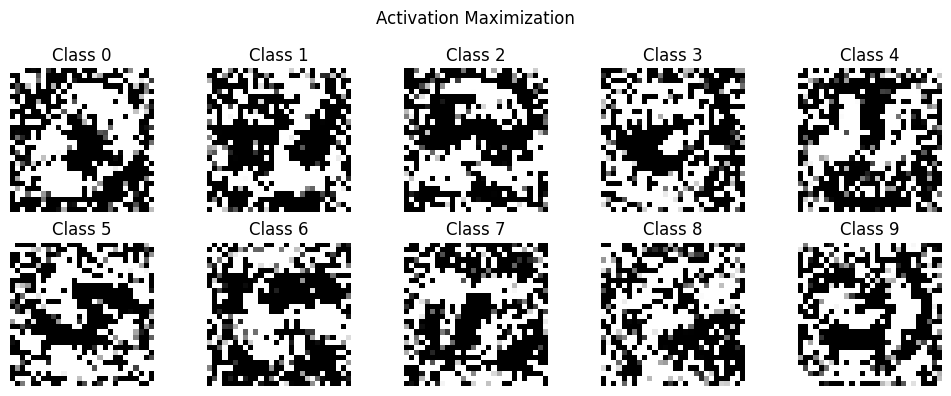

In [66]:
act_max_nn.show_images_grid(images)

In [68]:
def plot_activation_history_grid(history):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    for class_idx in range(10):
        ax = axes[class_idx]
        for attempt_idx, attempt in enumerate(history[class_idx]):
            ax.plot(attempt, label=f'Attempt {attempt_idx+1}')
        ax.set_title(f'Class {class_idx}')
        ax.set_xlabel('Step')
        ax.set_ylabel('Activation')
        ax.legend(fontsize='small')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

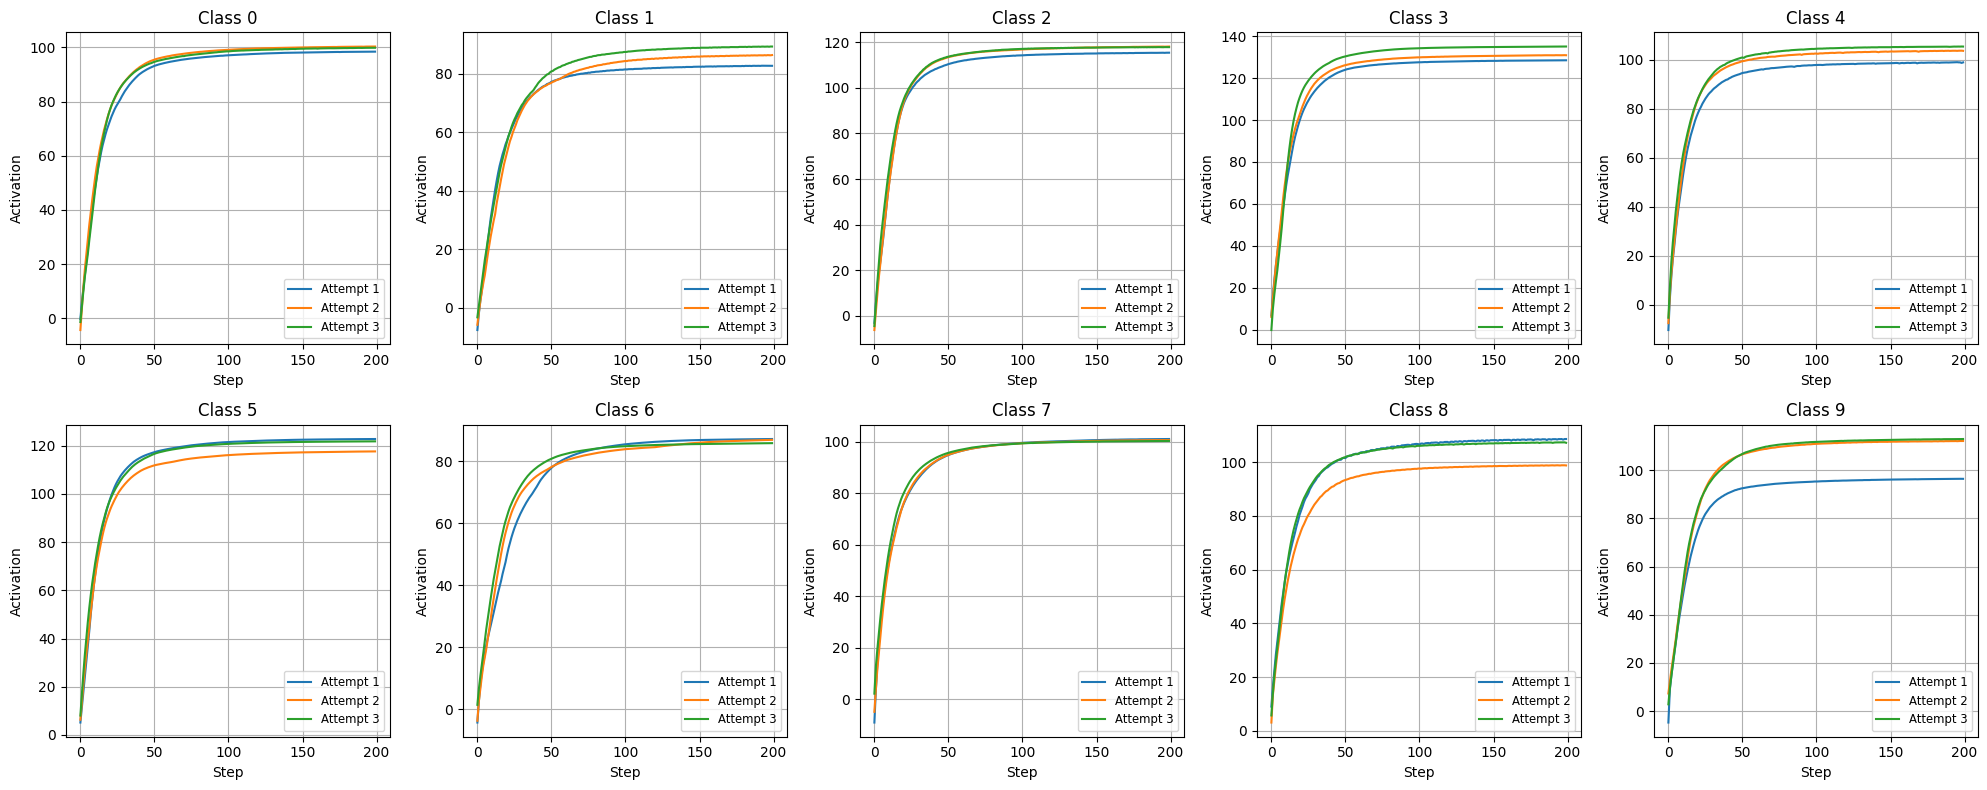

In [69]:
plot_activation_history_grid(history)